- Build a linear models of degree 2 to estimate $v_l$ <br>
- Use 4 samples of train data for training and  <br>
- Use gradient descent method for finding the weights. <br>
- Update the weights for each sample. <br>
- Do weight updates for 100 epochs. (use train data only) <br>
- Report the values predicted on the 3 samples of test data in the variable Y_pred_test (shape is (3,))

- Hint : Take inputs in units of metres (0.6, 0.5, 0.3, 0.2)


### Train Data
| Sonar S | $v_l$   |$v_r$|
|---------|---------|-----|
|60cm |10cm/sec |10cm/sec |
| 50cm |9cm/sec| 9cm/sec |
| 30cm | 7cm/sec | 4cm/sec |
|20cm | 4cm/sec | 0cm/sec|

### Test Data
| Sonar S | $v_l$   |$v_r$|
|---------|---------|-----|
|40cm |8cm/sec |8cm/sec |
| 35cm |7.5cm/sec| 6cm/sec |
| 25cm | 6cm/sec | 2cm/sec |

In [0]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

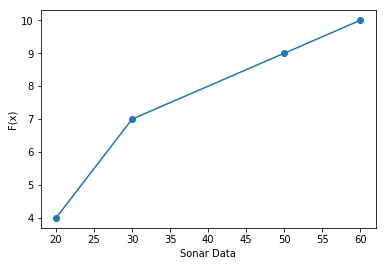

In [21]:
import numpy as np
import matplotlib.pyplot as plt
S=np.array([60,50,30,20])
yd=np.array([10,9,7,4])
plt.plot(S,yd,'-o')
plt.ylabel('F(x)')
plt.xlabel('Sonar Data')
plt.show()

In [0]:
D=2
N=S.shape[0]
A=np.ones((N,3))
for d in range (1,3):
    A[:,d]=np.power(S,d)

In [23]:
!pip install -q matplotlib-venn
from rpy import r
my_x = [0.6,0.5,0.3,0.2]
my_y = [0.1,0.9,0.7,0.4]
ls_fit = r.lsfit(my_x,my_y)
gradient = ls_fit['coefficients']['X']
yintercept= ls_fit['coefficients']['Intercept']

r.png("scatter_regression.png", width=400, height=350)
r.plot(x=my_x, y=my_y, xlab="x", ylab="y", xlim=(0,7), ylim=(-16,27),
       main="Example Scatter with regression")
r.abline(a=yintercept, b=gradient, col="red")
r.dev_off()

ModuleNotFoundError: ignored

In [0]:
import numpy as np
x = np.array([0.6,0.5,0.3,0.2])
D=2
yd = np.array([10,9,7,4])
def createA(x, D):
    P=np.ones((len(x),D+1))
    #print(D)
    for i in range(0,D+1):
      P[:,i]=x.T**i
  
  

    #print(P)
    
    return(P)
A=createA(x, D)
#print(A.shape)
def train_w(A, yd):
  np.random.seed(0)
  D=A.shape[0]-1
  #print(D,'D')
  w = (2*np.random.rand(D,1) - 1)/2
  print(A.shape,w.shape)
  #print(w)
  eta=0.0001
  yd=yd.reshape(len(yd),1)
  #print(yd)
    
  for i in range (500):
    y=A@w
    e=(np.subtract(yd,y)**2)/(A.shape[0]*A.shape[1])
    #print(e.reshape(1,3),'e    ',i)
    w=w+(eta*(A.T.dot(e)))
    #print(w.reshape(1,3),'w','\n')
    #print(w ,'w')
  return w , y ,e

    
w,y,e=train_w(A, yd)
print(x,'\n',y,'\n',yd,'\n','\n',w)